<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practice" data-toc-modified-id="Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practice</a></span></li><li><span><a href="#Excercise" data-toc-modified-id="Excercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Excercise</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Findings</a></span></li></ul></div>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

### Practice

Build a predictor function to predict price of a home with:

> 3400 sqft of area in West Windsor

> 2800 sqft of area in Robbinsville

In [47]:
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [48]:
dummies = pd.get_dummies(df.town)

merged = pd.concat([df, dummies], axis='columns').drop(['town', 'west windsor'], axis=1)
merged

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [49]:
model = linear_model.LinearRegression()

In [50]:
X = merged.drop('price', axis=1)
y = merged.price
model.fit(X.values, y)

LinearRegression()

In [51]:
#predicting for robbinsville
model.predict([[2800, 0, 1]])

array([590775.63964739])

In [52]:
#predicting for west windsor
model.predict([[3400, 0, 0]])

array([681241.66845839])

In [53]:
model.score(X, y)

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9573929037221873

In [54]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [56]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [57]:
X = dfle[['town', 'area']].values
y = dfle.price.values

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [59]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [60]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [61]:
model.fit(X,y)

LinearRegression()

In [62]:
model.predict([[1, 0, 2800]])

array([590775.63964739])

In [63]:
model.predict([[0, 1, 3400]])

array([681241.6684584])

### Excercise

Load carprices.csv then plot the data points on a scatter plot to see if linear regression can be applied. If so, then build a model to answer the following questions:

> Predict the price of a mercedez benz that is 4 yrs old with mileage 45,000

> Predict the price of a BMW X5 that is 7 yrs old with mileage 86,000

> What is the accuracy of the model? 

In [64]:
df_car = pd.read_csv('carprices.csv')
df_car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


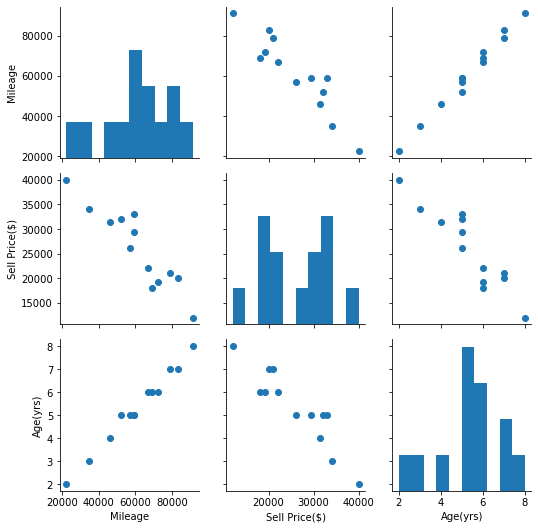

In [65]:
import seaborn as sns

car_stats = ['Mileage', 'Sell Price($)', 'Age(yrs)']
g = sns.PairGrid(data=df_car, vars = car_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

No curvature present, Mileage and Age tend to normal distributions, and pairwise scatterplots show linear correlations.

Let's proceed with the Multi-Linear Regression.

In [66]:
dummies_car = pd.get_dummies(df_car['Car Model'])

merged_car = pd.concat([df_car, dummies_car], axis='columns')
merged_car

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


We need our model to be of rank to prevent multicollinearity so we will drop one column, Audi A5

In [67]:
merged_car = merged_car.drop(['Car Model', 'Audi A5'], axis=1)

In [68]:
merged_car

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [69]:
model_car = linear_model.LinearRegression()
model_car.fit(merged_car[['Mileage', 'Age(yrs)', 'BMW X5', 'Mercedez Benz C class']].values, merged_car['Sell Price($)'])

LinearRegression()

In [70]:
model_car.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [71]:
model_car.predict([[86000, 7, 1, 0]])

array([11080.74313219])

In [72]:
X = merged_car[['Mileage', 'Age(yrs)', 'BMW X5', 'Mercedez Benz C class']].values
y = merged_car['Sell Price($)']
model_car.score(X, y)

0.9417050937281083

### Findings

> The price of a mercedez benz that is 4 yrs old with mileage 45,000: USD 36,991

> The price of a BMW X5 that is 7 yrs old with mileage 86,000: USD 11,080

> Accuracy of the linear regression model: 94%